In [1]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import warnings
from wafer_plot import draw_wafer_plot

warnings.filterwarnings('ignore')

In [2]:
p_current = Path().resolve().parent
root = p_current / 'results' / 'BO_wafer3_data' / 'dcoupler_splitter_calib_test_cells_BO_wafer3'

gap_widths = np.array([0.18, 0.19, 0.2, 0.205])
lengths = np.array([1.0, 1.35, 1.7, 2.05, 2.4, 2.75, 3.1, 3.45, 3.8, 4.15, 4.5, 4.85, 5.2, 5.55, 5.9, 6.25, 6.6, 6.95, 7.3, 7.65])
ret_num = 33

data_dir_gen = sorted(root.glob(f'reticle{ret_num}/*.json'))
for d in data_dir_gen:
    df = pd.read_json(d)
    ret = int(df['reticle'][0])

    wavel = df['wavelength']
    trans = df['transmission_ch1']

bar = {}
cross = {}
for i, g in enumerate(gap_widths):
    bar[g] = []
    cross[g] = []
    for j, l in enumerate(lengths):
        bar[g].append(trans[i*len(lengths)*2 + j*2][2500])  # 2500 is the index for wavelength 1310 nm
        cross[g].append(trans[i*len(lengths)*2 + j*2 + 1][2500])

print(bar)
print(cross)

dBm_to_mW = lambda p_dBm: 10 ** np.divide(np.array(p_dBm), 10)
bar_lin = {gap:dBm_to_mW(trans) for gap, trans in bar.items()}
cross_lin = {gap:dBm_to_mW(trans) for gap, trans in cross.items()}


# get a wafer plot
# draw_wafer_plot(data=losses, title=df['test_cell'][0])

{0.18: [-15.6902742386, -15.9632349014, -16.1922779083, -16.4504737854, -16.6719207764, -16.4824771881, -16.4160823822, -16.2860546112, -16.3207817078, -15.9156618118, -15.2122325897, -14.9815540314, -14.5207643509, -14.4080781937, -14.1687030792, -13.6979055405, -13.5124282837, -13.5013561249, -13.2950458527, -13.282327652], 0.19: [-15.5038461685, -15.7587547302, -16.0025272369, -16.0783042908, -16.3206329346, -16.1947288513, -16.0916442871, -16.1049308777, -15.7501144409, -15.5176124573, -15.1264476776, -14.7982797623, -14.6209039688, -14.319644928, -13.924243927, -13.9166069031, -13.815735817, -13.853485107400001, -13.4976348877, -13.4936828613], 0.2: [-15.4468164444, -15.6329307556, -15.85683918, -15.8655529022, -16.1274814606, -16.205532074, -16.20353508, -16.137462616, -15.8455286026, -15.7003316879, -15.379075050400001, -15.2078227997, -14.7949905396, -14.5912599564, -14.2527828217, -14.0485811234, -13.8103504181, -13.6541824341, -13.3341789246, -13.2778501511], 0.205: [-15.0022

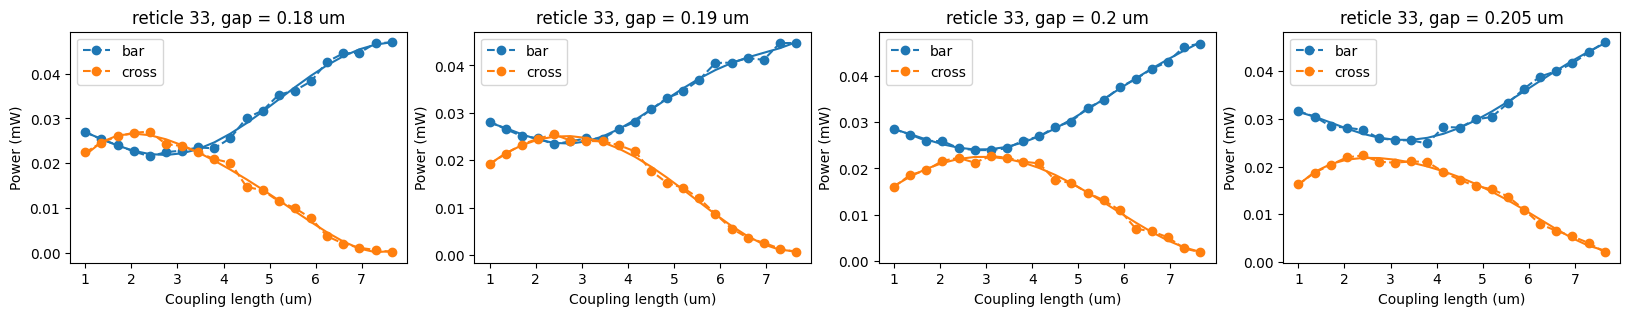

In [3]:
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]

# make plots
fig, axes = plt.subplots(1, 4, figsize = (20, 3))
for i, g in enumerate(gap_widths):
    # fit data
    bar_coefs = poly.polyfit(lengths, bar_lin[g], 5)
    bar_fit = poly.Polynomial(bar_coefs) 
    if i < 0:
        cross_coefs = poly.polyfit(lengths[2:], cross_lin[g][2:], 5)
        cross_fit = poly.Polynomial(cross_coefs) 
    else:
        cross_coefs = poly.polyfit(lengths, cross_lin[g], 5)
        cross_fit = poly.Polynomial(cross_coefs) 

    ax = axes[i]
    ax.plot(lengths, bar_lin[g], 'o--', color=colors[0], label='bar')
    ax.plot(lengths, bar_fit(lengths), color=colors[0])
    ax.plot(lengths, cross_lin[g], 'o--', color=colors[1], label='cross')
    ax.plot(lengths, cross_fit(lengths), color=colors[1])
    ax.set_xlabel('Coupling length (um)')
    ax.set_ylabel('Power (mW)')
    ax.set_title(f'reticle {ret_num}, gap = {g} um')
    ax.legend()

In [4]:
# Wafer-level analysis for the nomial case: gap = 0.2 um, length = 3.1 um
p_current = Path().resolve().parent
root = p_current / 'results' / 'BO_wafer3_data' / 'dcoupler_splitter_calib_test_cells_BO_wafer3'

gap_widths = np.array([0.18, 0.19, 0.2, 0.205])
lengths = np.array([1.0, 1.35, 1.7, 2.05, 2.4, 2.75, 3.1, 3.45, 3.8, 4.15, 4.5, 4.85, 5.2, 5.55, 5.9, 6.25, 6.6, 6.95, 7.3, 7.65])

data_dir_gen = sorted(root.glob(f'reticle*/*.json'))
bar = {}
cross = {}

for d in data_dir_gen:
    df = pd.read_json(d)
    ret = int(df['reticle'][0])

    wavel = df['wavelength']
    trans = df['transmission_ch1']
    bar[ret] = trans[92][2500]  # i*len(lengths)*2 + j*2][2500]
    cross[ret] = trans[93][2500]

print(bar)
print(cross)

# dBm_to_mW = lambda p_dBm: 10 ** np.divide(np.array(p_dBm), 10)
# bar_lin = {gap:dBm_to_mW(trans) for gap, trans in bar.items()}
# cross_lin = {gap:dBm_to_mW(trans) for gap, trans in cross.items()}

{0: -16.3077335358, 1: -16.8632106781, 10: -16.5763683319, 11: -16.6141204834, 12: -16.7263431549, 13: -16.7080535889, 14: -16.4410743713, 15: -16.0385379791, 16: -15.9428310394, 17: -16.5393810272, 18: -16.4507598877, 19: -15.0154352188, 2: -16.3436965942, 20: -15.1117506027, 21: -15.6964378357, 22: -16.9009246826, 23: -16.4326553345, 24: -15.7364406586, 25: -16.3633346558, 26: -15.0758743286, 27: -14.6410560608, 28: -15.0969076157, 29: -15.8682823181, 3: -15.7307720184, 30: -16.3769226074, 31: -16.3851490021, 32: -15.9193916321, 33: -16.20353508, 34: -15.6935844421, 35: -14.833652496300001, 36: -14.4696950912, 37: -14.9352178574, 38: -15.99193573, 39: -16.1066589355, 4: -16.0863990784, 40: -15.9205570221, 41: -16.1305332184, 42: -16.1431655884, 43: -14.9103221893, 44: -15.2153186798, 45: -15.9743537903, 46: -15.9306812286, 47: -15.0951185226, 48: -15.8761463165, 49: -15.9901409149, 5: -16.418182373, 50: -15.9831066132, 51: -15.8951530457, 52: -15.9745359421, 53: -15.7487926483, 54: -

{0: 1.025730451549737, 1: 0.9847530430837154, 10: 1.0125842669189529, 11: 0.9673649828873128, 12: 0.9938947420224418, 13: 1.003105445691447, 14: 0.9935783284937229, 15: 1.0547837100923116, 16: 1.1274703785134408, 17: 1.0297684053990284, 18: 0.9957188093380529, 19: 1.0674510507534822, 2: 1.0097864659493359, 20: 1.0827492061849193, 21: 1.0453188251332373, 22: 1.0367217102484843, 23: 1.05966597833813, 24: 1.0904971875808993, 25: 1.0552275905873254, 26: 1.0520709771125742, 27: 1.0893648714547879, 28: 1.0899853336006045, 29: 1.0776472274488955, 3: 0.9939792087431686, 30: 1.0895344883821203, 31: 1.099269850254756, 32: 1.1439363770518094, 33: 1.0573350924649785, 34: 1.0971438106130609, 35: 1.1705798676238093, 36: 1.1509372728439797, 37: 1.0659844600006254, 38: 1.118993963063795, 39: 1.1195469735260368, 4: 1.0574470100742805, 40: 1.137602664489246, 41: 1.166138529975117, 42: 1.1362190705075703, 43: 1.1741059752899967, 44: 1.138463828711298, 45: 1.1288894264929181, 46: 1.1524706328741725, 47: 1

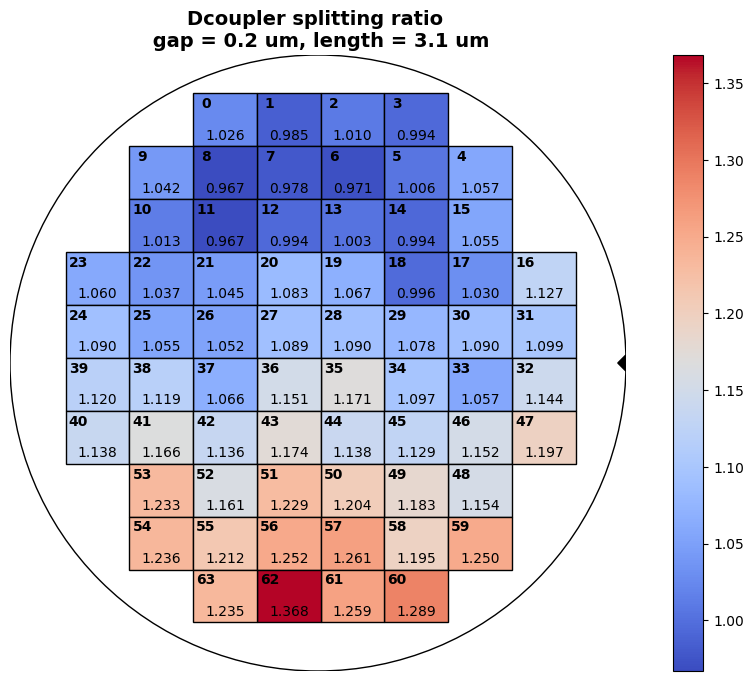

In [11]:
bar_lin = {ret:10**(trans/10) for ret, trans in bar.items()}
cross_lin = {ret:10**(trans/10) for ret, trans in cross.items()}
splitting_ratio = {b_k:b_v/c_v for (b_k, b_v), (c_k, c_v) in zip(bar_lin.items(), cross_lin.items())}
print(splitting_ratio)

# get a wafer plot
draw_wafer_plot(data=splitting_ratio, title=f'Dcoupler splitting ratio \n gap = 0.2 um, length = 3.1 um')